### Libaries


In [226]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.datasets import make_blobs
from collections import defaultdict


### Read Data 

In [227]:
data = make_blobs(n_samples=1000,n_features=3,centers=5)
print(data[0])

[[ 8.70223333  2.02648311  3.47593276]
 [ 7.66954809 -3.66269386 -9.58753533]
 [ 6.32118405  1.60618069  2.07874925]
 ...
 [-3.77696417 -6.06023311 -8.2538038 ]
 [-5.36884743 -7.10509535 -9.84026357]
 [-0.496936   -6.71820281  3.48216665]]


In [228]:
df = pd.DataFrame(data[0],columns=['x','y','z'])
df

,x,y,z
0,8.702233,2.026483,3.475933
1,7.669548,-3.662694,-9.587535
2,6.321184,1.606181,2.078749
3,5.924983,-3.499992,-8.861229
4,6.950224,-3.524940,-7.704846
...,...,...,...
995,-2.584768,-6.800188,1.944205
996,-2.431797,-6.846229,3.571551
997,-3.776964,-6.060233,-8.253804
998,-5.368847,-7.105095,-9.840264


### Visualizing the data

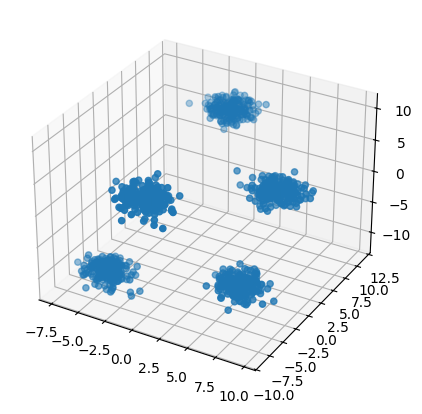

In [229]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(df.x,df.y,df.z)

 ### Euclidean distance 
 we're creating Euclidean distance  metric which is required to assign an appropriate cluster for each of the data points

$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 
}
$$

In [230]:
def dist(pt1,pt2):
    if type(pt1)!= type(np.array([])) or type(pt2)!= type(np.array([])):
        pt1,pt2 = np.array(pt1),np.array(pt2)
    return np.sqrt(((pt1-pt2)**2).sum()) 

## k-Means Clustering algorithm 

In [231]:
def kmeans(k,thres,data,iter):
    
    # initialize random point as centroids
    means = data.sample(k).values
    count = 0 
    compare = []

    while count< iter:
        count+=1
        mean_dict = defaultdict(list)

        for point in data.values:
            tmp = None
            mindist = float('inf')
            
            #calculate the distance to each centroid 
            for mean in means:         
                d = dist(mean,point)
                if d < mindist:
                   mindist = d
                   tmp = mean
            

            #assign the data point to the closest centroid
            mean_dict[str(tmp)].append(list(point))  


        # Update each centroid by computing the mean of all data points assigned to it
        means = []
        for mean in mean_dict:
            means.append(list(np.array(mean_dict[mean]).mean(axis=0)))
        
        compare.append(np.array(means))

        if len(compare)>1 and dist(compare[-1],compare[-2])<thres:
            print(f'the algo converged in {count} iteration')
            return means
        
    return means


In [232]:
mu = kmeans(5,0.0001,df,1000)

the algo converged in 4 iteration


In [233]:
print(f' The centroids of k-clusters are {mu}')

 The centroids of k-clusters are [[6.83939179242244, 2.510035924840257, 2.3440237990972244], [6.219123901072286, -3.0672534841683667, -8.50131439697073], [-0.4085477424887774, 8.774161602878241, 7.442434652195362], [-4.350333923641192, -6.088733907428338, -9.520328286621973], [-0.8469791682000881, -5.876485781184292, 3.5919598732902545]]


In [246]:
def coloring(point1, point2, point3):
    mindist = float('inf')  
    ans = None  
    point = [point1, point2, point3]  
    

    # iterates through each centroid in mu
    for i, pt in enumerate(mu): 
        distance = dist(pt, point) 
        if distance < mindist: 
            mindist = distance 
            ans = i # index of the centriod
    return ans  


In [241]:
def assign_color(df):
    return coloring(df.x, df.y, df.z)


In [248]:
df['color'] = df.apply(assign_color, axis=1)

In [212]:
df.head()

,x,y,z,color
0,7.550896,-9.743844,-1.772013,0
1,8.061463,-0.036029,-7.069308,1
2,7.538614,7.658582,-2.979463,2
3,5.475464,8.160843,-1.669572,2
4,7.753382,-8.910702,0.256444,0


#### Visualizing the dataset based on the clusters

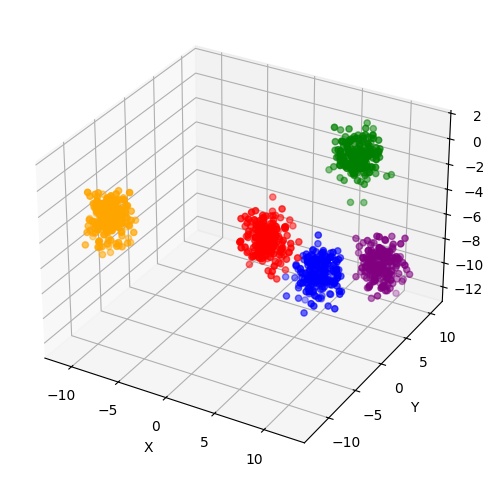

In [219]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(projection='3d')


hue = ['Red', 'Blue', 'Green', 'Purple', 'Orange']  

unique = df['color'].unique()
for i in unique:
    data = df[df['color'] == i]
    ax.scatter(data['x'], data['y'], data['z'], c=hue[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show() 
